In [15]:
import handcalcs.render

from matplotlib import pyplot as plt
import numpy as np
from math import pi
from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

We found the flow rate needed to keep up with a output of 1,500,000 gallons/day to be 3,125 gal/min

62,500 gal/hr * 8hr - x * 8 hr = 1,000,000 gal/day
x = 187,500 gal/hr = 3,125 gal/min

In [16]:

L = 4378*u.feet
k = 0.0005 *u.feet
D = 5.45 *u.inch
O = 1760 /u.min
g = 9.81 *u.m/u.sec/u.sec
rho = 999.7 *u.kg/u.m/u.m/u.m
mu = 1.307*10**(-3) *u.kg/u.m/u.sec

n = 9 #Data chosen from the data set given. The ninth is chosen because the effiecency for power is the heighest
#Keeping the power down is extremely important to keep the cost down.
Qr = 3125 *u.gal/u.min #Flow rate
Or = 1200 /u.min #Pump speed chosen from reducing the cost

#Data given by the company
Q = [0*u.gal/u.min, 5*u.gal/u.min,10*u.gal/u.min,15*u.gal/u.min,20*u.gal/u.min,25*u.gal/u.min,30*u.gal/u.min,35*u.gal/u.min,40*u.gal/u.min,45*u.gal/u.min,50*u.gal/u.min,55*u.gal/u.min,60*u.gal/u.min]
H = [28.0*u.feet,28*u.feet,29*u.feet,29*u.feet,28*u.feet,28*u.feet,27*u.feet,26*u.feet,25*u.feet,23*u.feet,21*u.feet,18*u.feet,15*u.feet]
E = [0,13,25,35,44,48,51,53,54,55,53,50,45] #Effecieny




In [17]:
%%render
#Dimensionless analysis
#Flow/(omega*D**3) = Flow.rate/(omega*D**3) which was solved for the pump height with given company data, found the flow rate and chosen pump speed
Dr = ((Qr*O*(D**3))/(Or*Q[n]))**(1/3)
#Pressure/(/rho*omega**2*Diameter**2) = Pressure/(/rho*omega**2*Diameter**2) which is solved for the Hpump 
Hpump = (Or**2*Dr**2*H[n])/(O**2*D**2) #How high the pump pushes the water

<IPython.core.display.Latex object>

In [18]:
Dr.to('inch')

25.451857253453095 <Unit('inch')>

Lowering the pump revolution speed increases the pump diameter a little, but decreases the power cost by a lot more.

In [19]:
L1 = list(np.arange(6.75,12,0.1))

Dpipe = L1*u.inch

# Bernoulli's energy equation
# hpump = v_2^2/2g + z_2 + Hminor + Hmajor
hpump = ((Qr/(pi*Dpipe**2/4))**2)/(2*g) + 150*u.feet + (4*0.3*((Qr/(pi*Dpipe**2/4))**2)/(2*g)) + (10*10*((Qr/(pi*Dpipe**2/4))**2)/(2*g)) + 0.0055*(1+(2*10**4*(k/Dpipe) + 10**6/((rho*(Qr/(pi*Dpipe**2/4))*Dpipe)/mu))**(1/3))*L*(Qr/(pi*Dpipe**2/4))**2/(2*Dpipe*g)
# how much pump height is needed because of head loss

In [20]:
%%render 
hpump = ((Qr/(pi*Dpipe**2/4))**2)/(2*g) + 150*u.feet + (4*0.3*((Qr/(pi*Dpipe**2/4))**2)/(2*g)) + (10*10*((Qr/(pi*Dpipe**2/4))**2)/(2*g)) + 0.0055*(1+(2*10**4*(k/Dpipe) + 10**6/((rho*(Qr/(pi*Dpipe**2/4))*Dpipe)/mu))**(1/3))*L*(Qr/(pi*Dpipe**2/4))**2/(2*Dpipe*g)
# how much pump height is needed because of head loss

<IPython.core.display.Latex object>

In [21]:
hpump.to('feet')


Magnitude,[3303.2482875315977 3091.1789032969086 2896.3705795111828 2717.185683606107 2552.163126736071 2399.9971332281825 2259.5188185010375 2129.6801712380675 2009.5400983414686 1898.2522435070725 1795.0543339927274 1699.2588468009685 1610.2448162828275 1527.4506310915924 1450.3676902917684 1378.5348069317429 1311.5332630728415 1248.98243359012 1190.5359074003172 1135.878044444316 1084.720915016754 1036.8015751122982 991.8796375285765 949.7351036826745 910.1664255892914 872.9887713219052 838.0324706242802 805.1416202349956 774.1728309970892 744.9941010033626 717.4838009219404 691.5297592959761 667.0284370497008 643.8841816891721 622.0085527847002 601.3197112841364 581.7418660500981 563.2047717552894 545.6432729217898 528.9968894639912 513.2094396007592 498.2286964489386 484.00607500498717 470.496346570723 457.65737798853206 445.4498933257459 433.8372558915143 422.7852686860339 412.2619915746915 402.2375736513246 392.6840994078692 383.5754474643009 374.88716073487006]
Units,foot


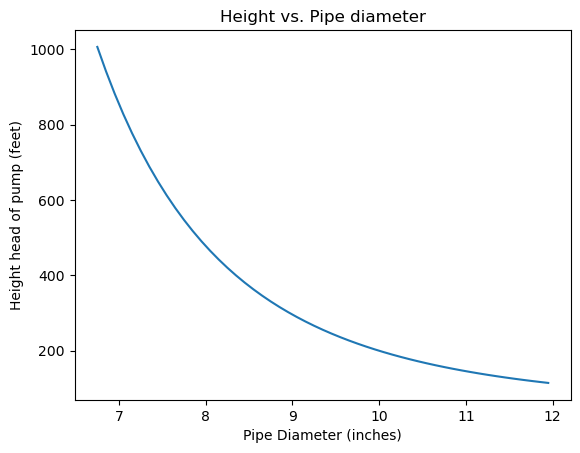

In [22]:
plt.plot(Dpipe,hpump)
plt.title("Height vs. Pipe diameter")
plt.xlabel("Pipe Diameter (inches)")
plt.ylabel("Height head of pump (feet)")
plt.show()

Choosing a diameter that is that lower than the Hpump discovered previously. 

In [23]:
%%render
#Diameter chosen from graph because it fits with the pump head height
dpipe = 11*u.inch
Wpump = Qr*rho*Hpump*g
Ppump = Wpump/(E[9]/100)

<IPython.core.display.Latex object>

In [24]:
Wpump.to('kW')

137.42840586021862 <Unit('kilowatt')>

In [25]:
%%render
# Cost
Cost = (3500 + 1500*Dr/u.inch) + 4*(300 + 200*dpipe/u.inch) + 10*(50 + 50*dpipe/u.inch) + dpipe/u.inch*(L/u.foot)+ 0.10*(Ppump*8760/u.kW)


<IPython.core.display.Latex object>

The cost have the units in dollars 

The cost is calculated with a years worth of electricity. There's 8,760 hours in one year.